In [10]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
%matplotlib inline # 주피터 노트북에서 그림을 확인하기위한 코드
# os.listdir('dataset/titanic')

In [3]:
# df = pd.read_csv('dataset/titanic/train.csv')
df = pd.read_csv('train.csv')

# 인덱스 한글이면 encoding = "cp949" 옵션 추가. utf-8보다 좋음 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
mpl.rcParams['font.family']

['Malgun Gothic']

In [22]:
# matplotlib에서 한글 폰트, 마이너스(숫자)가 안보일 때 설정하는 방법
# mac ver
#plt.rc('font', family = 'AppleGothic')

# Windows ver
mpl.rc('font', family = 'Malgun Gothic')

# 마이너스 숫자 설정
mpl.rc('axes', unicode_minus = False)

코랩 환경에서는 나눔폰트 사용해서 적용하기  : https://jonsyou.tistory.com/22

공식 문서 : https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
# style, Color - line style, color, color map

In [ ]:
#  그래프 설정
plt.figure(figures = (n,m)) # 그래프 크기 조절
plt.title('text', fontsize=15) # 그래프 제목 설정
plt.xlim([min, max]) # x축 범위 설정
plt.ylim([min, max]) # y축 범위 설정

plt.xlabel('text', fontsize=15) # x축 라벨 설정
plt.ylabel('text', fontsize=15) # y축 라벨 설정
plt.grid() # 격자 생성

plt.savefig('저장경로') # 그래프 저장
plt.legend() # 범례 표시
plt.text(x, y, 'text') # 텍스트 표시

plt.xaxis(rotation=90, fontsize = '15') # x축 폰트 회전 및 크기 설정
plt.yaxis(rotation=90, fontsize = '15') # y축 폰트 회전 및 크기 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()
# Age에 결측치 177개

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 히스토그램과 막대 그래프
df[['Age', 'Fare', 'Pclass']] = df[['Age', 'Fare', 'Pclass']].astype(float) # 형태 변환 
df['Age'] = df['Age'].fillna(df['Age'].median()) # 결측치는 Age의 중앙값으로 채워넣음
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 히스토그램과 막대그래프

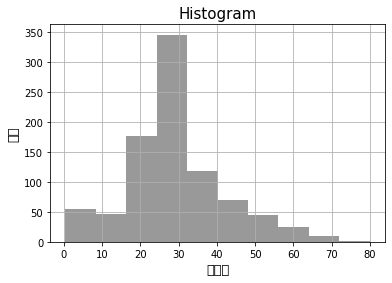

*빈도 array :  [ 54.  46. 177. 346. 118.  70.  45.  24.   9.   2.]
*구간 array :  [ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]


In [19]:
# Histogram

plt.title('Histogram', fontsize = '15')
frq, bins, fig = plt.hist(df['Age'], bins=10, alpha=.8, color='grey') # 디폴트 

plt.ylabel('빈도', fontsize=13)
plt.xlabel('연령대', fontsize=13)

plt.grid()
plt.show()

print('*빈도 array : ',frq)
print('*구간 array : ',bins)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

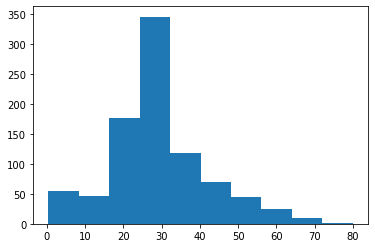

In [12]:
plt.hist(df['Age'])

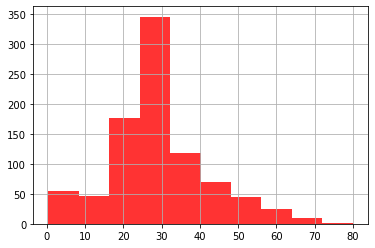

In [13]:
# pandas 내장 기능으로도 수행 가능
df['Age'].hist(bins = 10, alpha=.8, color='r')

Text(0.5, 0, '생존여부')

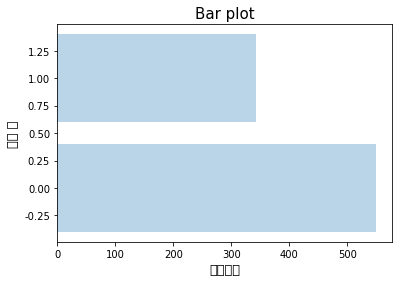

In [25]:
# bar plot

bar_df = df['Survived'].value_counts().reset_index()
# 범주별 count 나눠서 저장해두기

plt.title('Bar plot', fontsize=15)
# plt.bar(bar_df['index'], bar_df['Survived'], alpha=.3)
plt.barh(bar_df['index'], bar_df['Survived'], alpha=.3) # 누워있는 막대그래프 생성

plt.ylabel('사람 수', fontsize=13)
plt.xlabel('생존여부', fontsize=13)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


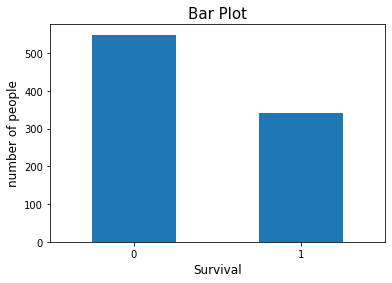

In [30]:
# pandas 내장기능

df['Survived'].value_counts().plot(kind='bar') # 디폴트는 line

plt.title("Bar Plot", fontsize=15)
plt.ylabel("number of people", fontsize=12)
plt.xlabel("Survival", fontsize=12)
plt.xticks(rotation=0) # 이건 모지?
plt.show()

In [51]:
# 누적 막대 그래프 - 성별, 생존여부별, 사람 수 가시적으로 보여주기 좋다

# df.groupby(['Sex','Survived']).describe()
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,27.929936,12.860189,0.75,21.0,28.0,35.0,63.0
male,577.0,30.140676,13.050847,0.42,23.0,28.0,35.0,80.0


In [52]:
# pandas 내장 기능을 활용하는 것이 편리함!

stacked_bar_df = df.groupby(['Sex', 'Survived']).size().unstack()
stacked_bar_df

Survived,0,1
Sex,,
female,81,233
male,468,109


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

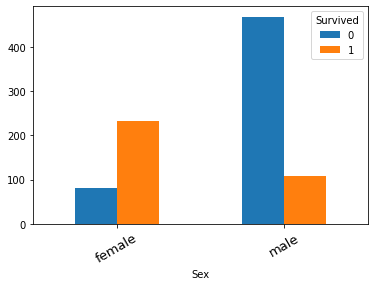

In [56]:
# 개별적으로 보여주기

stacked_bar_df.plot(kind='bar')
plt.xticks(rotation=30, fontsize = 13) # 이거 이름이 돌아가네


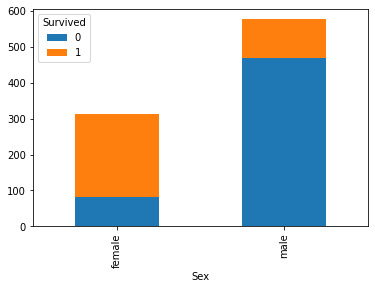

In [57]:
# 쌓아서 보여주기 
stacked_bar_df.plot(kind='bar', stacked=True)

### 3. 산점도

In [ ]:
# 어떻게 데이터가 분포하고 있는지 확인하기 위한 방법

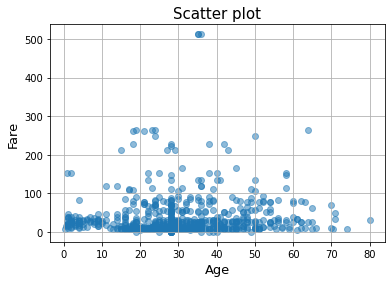

In [60]:
# 2D scatter plot 

# plt.scatter(x,y, s=마커 크기 값(또는 배열), c=마커 색 값(또는 배열))
plt.title('Scatter plot', fontsize = 15)
plt.scatter(df['Age'], df['Fare'],alpha=.5)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Fare', fontsize=13)
plt.grid()

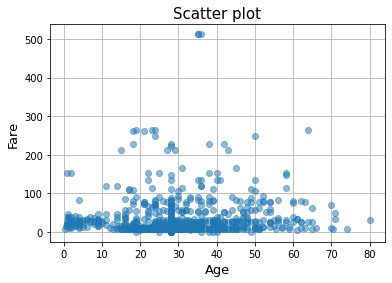

In [61]:
plt.title('Scatter plot', fontsize = 15)

plt.plot(df['Age'], df['Fare'], 'o', alpha=.5)

plt.xlabel('Age', fontsize=13)
plt.ylabel('Fare', fontsize=13)
plt.grid()

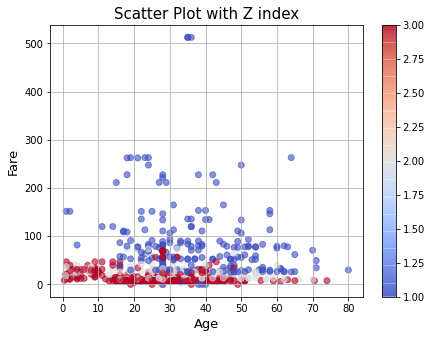

In [62]:
plt.figure(figsize=(7,5))
plt.title("Scatter Plot with Z index", fontsize=15)

plt.scatter(df["Age"], df["Fare"], c=df["Pclass"], cmap='coolwarm', alpha=.6)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Fare", fontsize=13)

plt.grid()
plt.colorbar()
plt.show()

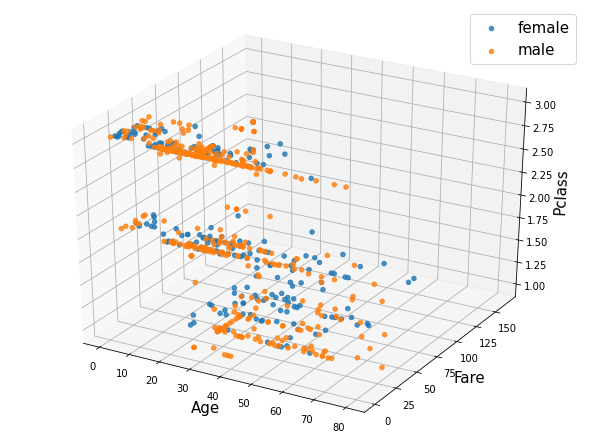

In [64]:
# 3D Scatter plot

df_t = df[df['Fare']<=200]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
plt.title('K_Clusters')
ax = Axes3D(fig)

for i in ['female', 'male']:
  tt = df_t[df_t['Sex']==i]
  ax.scatter(tt['Age'], tt['Fare'], tt['Pclass'], alpha=.8, label=i)

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Fare', fontsize=15)
ax.set_zlabel('Pclass', fontsize=15)
ax.legend(fontsize=15)



In [ ]:
"""
점을 뿌리기만 한다면 데이터의 분포는 확인할 수 있지만 
점들이 어디에 밀집되어 있는 가에 대한 밀도에 대한 식별을 하기 어렵다 

적당하게 alpha로 투명도를 줄 순 있겠지만 
격자를 나눠 빈도를 확인하면 더 명확하게 알 수 있다
"""
# plt.hist2d(x,y, (가로 셀 개수, 세로 셀 개수), 이하 옵션 동일)


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


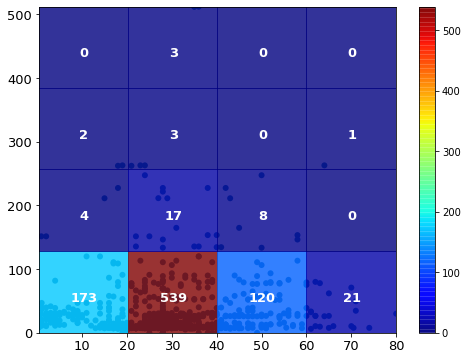

In [66]:
plt.figure(figsize = (8,6))
plt.scatter(df['Age'], df['Fare'], edgecolor = '')

# 도수 표현
hist, xbins, ybins, im = plt.hist2d(df['Age'], df['Fare'], (4,4), alpha=.8, cmap=plt.cm.jet)

# 각 셀의 텍스트 표기
for i in range(len(ybins)-1):
  for j in range(len(xbins)-1):
    plt.text(xbins[j]+10, ybins[i]+55, str(int(hist.T[i,j])), fontsize=13,
             color = 'w', ha='center', va='center', fontweight = 'bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.colorbar()

In [ ]:
# Scatter plot과 밀도



### 4. Box Plot

In [67]:
def plot_box(df, colname):
    box_ = plt.boxplot(df[colname], labels=[colname])
    plt.show()
    dict_ = {}
    dict_["label"] = colname
    dict_["cap_bottom"] = box_['caps'][0].get_ydata()[0]
    dict_["perc_25"] = box_['boxes'][0].get_ydata().min()
    dict_["median"] = box_['medians'][0].get_ydata()[1]
    dict_["perc_75"] = box_['boxes'][0].get_ydata().max()
    dict_["cap_top"] = box_['caps'][1].get_ydata()[0]
    return pd.DataFrame([dict_])

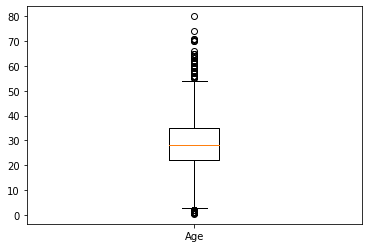

,label,cap_bottom,perc_25,median,perc_75,cap_top
0,Age,3.0,22.0,28.0,35.0,54.0


In [68]:
plot_box(df, "Age")

### 5. Line Plot

In [ ]:
"""
연속성이 존재하는, 시계열 데이터를 표현할 때 주로 활용한다
- 날씨 데이터 활용
"""

In [72]:
df = pd.read_csv('weather_2021.csv', encoding = 'cp949')

ParserError: ignored